In [38]:
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt

In [39]:
data_high_alpha = np.load('Simulations/Epsilon0.10_Alpha0.0003.npy', allow_pickle=True)

data_low_alpha = np.load('Simulations/Epsilon0.10_Alpha0.0010.npy', allow_pickle=True)

In [40]:
Soft_Stand = data[:, :, 1, 1] 
Hard_Stand = data[:, :, 1, 1] 
Soft_Hit = data[:, :, 1, 1] 
Hard_Hit = data[:, :, 1, 1] 

NameError: name 'data' is not defined

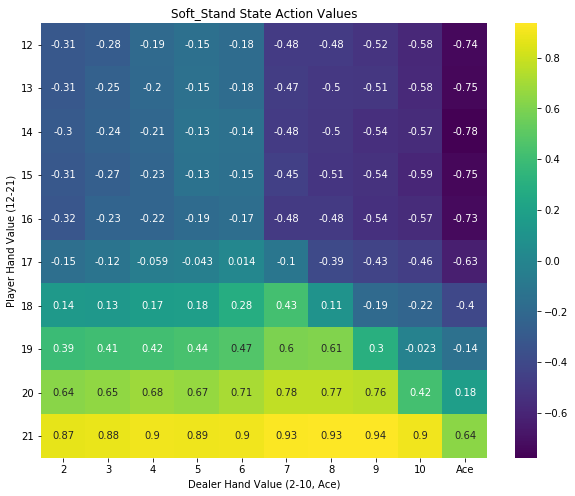

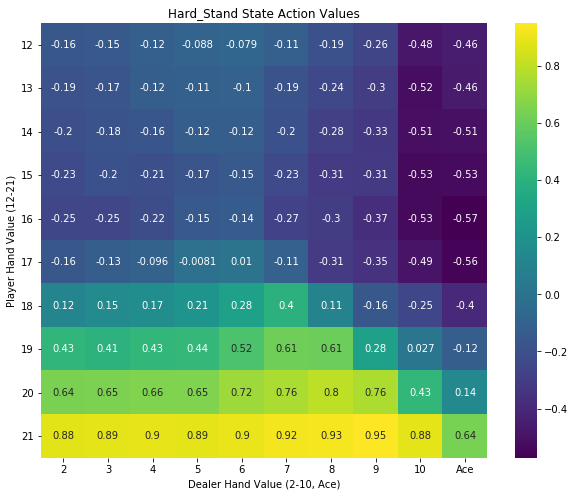

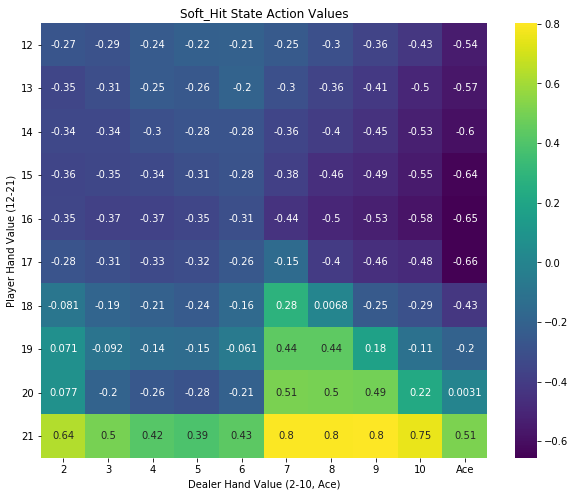

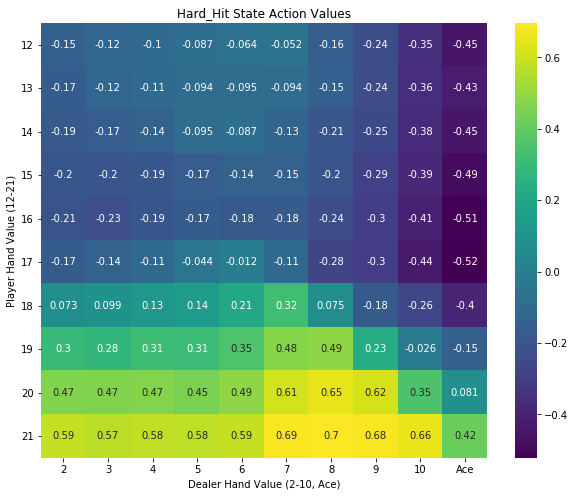

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def view_state_action_values(data):

    actions = {
        'Soft_Stand': (-1, slice(None), slice(None), 0, 0),
        'Hard_Stand': (-1, slice(None), slice(None), 1, 0),
        'Soft_Hit': (-1, slice(None), slice(None), 0, 1),
        'Hard_Hit': (-1, slice(None), slice(None), 1, 1)
    }

    for action, indices in actions.items():
        matrix = data[tuple(indices)]

        # Reorder the matrix for the dealer values (2-10, then Ace)
        #reordered_matrix = np.vstack([matrix[1:], matrix[0]]).T

        plt.figure(figsize=(10, 8))
        ax = sns.heatmap(matrix, annot=True, cmap='viridis')

        # Set the tick labels for player hand values (12-21) and dealer hand values (2-10, Ace)
        ax.set_yticklabels(range(12, 22), rotation=0)
        ax.set_xticklabels(list(range(2, 11)) + ['Ace'], rotation=0)

        plt.title(action + ' State Action Values')
        plt.xlabel('Dealer Hand Value (2-10, Ace)')
        plt.ylabel('Player Hand Value (12-21)')
        plt.show()

    return plt

view_state_action_values(data_high_alpha)


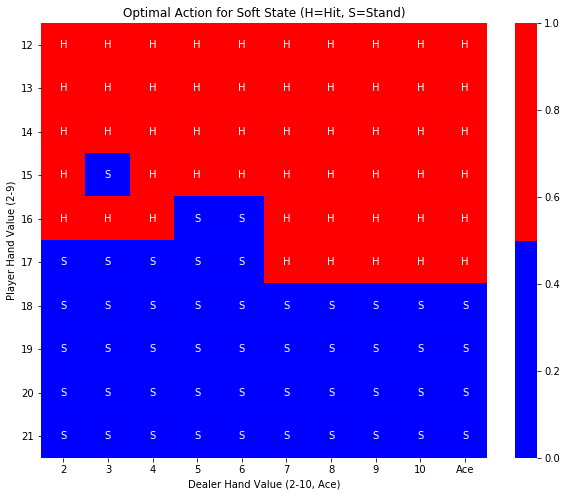

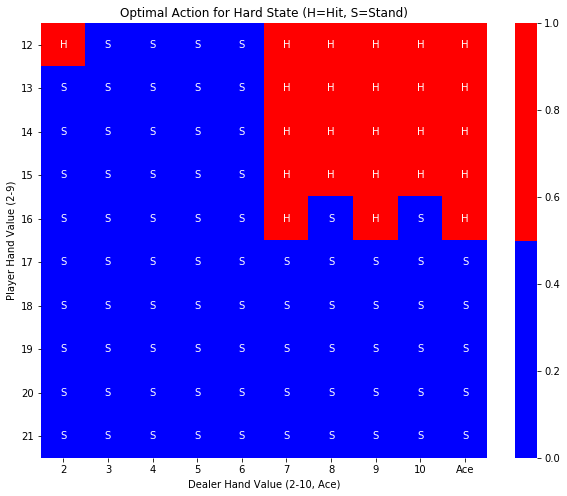

<Figure size 432x288 with 0 Axes>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def view_optimal_action(data, alpha):
    #Keep track of wrong Pairs:
    #Hard, Player 13 Dealer 2
    #Soft 17, Dealer 2 to 7.


    # Define the indices for each action
    actions = {
        'Soft_Stand': (-1, slice(None), slice(None), 1, 0),
        'Hard_Stand': (-1, slice(None), slice(None), 0, 0),
        'Soft_Hit': (-1, slice(None), slice(None), 1, 1),
        'Hard_Hit': (-1, slice(None), slice(None), 0, 1)
    }

    # Extract the matrices for each action
    matrices = {action: data[tuple(indices)] for action, indices in actions.items()}

    # Initialize and determine optimal actions for Soft and Hard states
    optimal_soft = np.where(matrices['Soft_Hit'] > matrices['Soft_Stand'], 1, 0)
    optimal_hard = np.where(matrices['Hard_Hit'] > matrices['Hard_Stand'], 1, 0)

    # Mapping for annotations
    action_map = {1: 'H', 0: 'S'}

    cmap = {1: 'red', 0: 'blue'}

    # Plotting
    for name, matrix in [('Soft', optimal_soft), ('Hard', optimal_hard)]:
        # Reorder the matrix for the dealer values (2-10, then Ace)
        reordered_matrix = matrix

        plt.figure(figsize=(10, 8))
        ax = sns.heatmap(reordered_matrix, annot=True, cmap=[cmap[0], cmap[1]], fmt='')

        # Update the annotations
        for i in range(reordered_matrix.shape[0]):
            for j in range(reordered_matrix.shape[1]):
                text = ax.texts[i * reordered_matrix.shape[1] + j]
                text.set_text(action_map[reordered_matrix[i, j]])

        # Set the tick labels for player hand values (2-9) and dealer hand values (2-10, Ace)
        ax.set_yticklabels(range(12, 22), rotation=0)
        ax.set_xticklabels(list(range(2, 11)) + ['Ace'], rotation=0)

        plt.title(f'Optimal Action for {name} State (H=Hit, S=Stand)')
        plt.xlabel('Dealer Hand Value (2-10, Ace)')
        plt.ylabel('Player Hand Value (2-9)')
        plt.show()

    # Directory path
    directory = 'Results/Alpha_' + alpha #+ '/Optimal State Action Policies'

    # Check if the directory exists, if not, create it
    if not os.path.exists(directory):
        os.makedirs(directory)

    # File path
    file_path = os.path.join(directory,'Optimal State Action Polices.png')
    plt.savefig(file_path)
    
    

view_optimal_action(data_high_alpha, '0.0010')

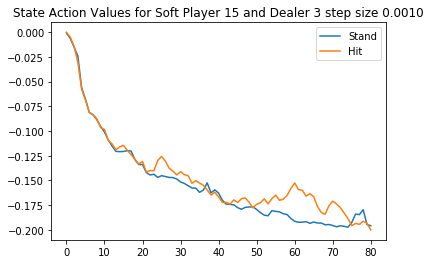

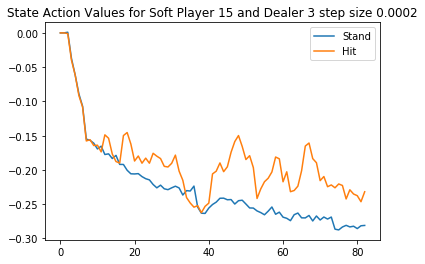

In [49]:
def hand_trajectory(player_val, dealer_val, usable_ace, data, iterations, alpha):
    #Plots monte carlo simulation trajectory

    #Example of one that doesn't work is SOFT 15 against dealer 3

    actions = [0,1] #Stand, Hit

    slices = [(slice(None), player_val-12, dealer_val-2, usable_ace, action) for action in actions]

    Selected_data_stand = data[slices[0]]
    Selected_data_hit = data[slices[1]]


    intervals = [1, 1000, 10000, 100000] + list(range(200000, iterations + 1, 100000))

    if usable_ace:
        hand_type_str = 'Soft'
    else:
        hand_type_str = 'Hard'

    plt.plot(np.arange(len(Selected_data_stand)), Selected_data_stand, label='Stand')
    plt.plot(np.arange(len(Selected_data_hit)), Selected_data_hit, label='Hit')
    plt.title('State Action Values for ' + hand_type_str + ' Player ' + str(player_val) + " and Dealer " + str(dealer_val) + ' step size ' + alpha)
    plt.legend()
    


    # Directory path
    directory = 'Results/State_Action_Trajectories'

    # Check if the directory exists, if not, create it
    if not os.path.exists(directory):
        os.makedirs(directory)
    

    # File path
    file_path = os.path.join(directory, f'{hand_type_str}_Player{player_val}_Dealer_{dealer_val}{alpha}.png')

    # Save the plot
    plt.savefig(file_path)
    plt.show()

    return

hand_trajectory(15, 3, 1, data_high_alpha, 10000000, '0.0010')
hand_trajectory(15, 3, 1, data_low_alpha, 10000000,'0.0002')

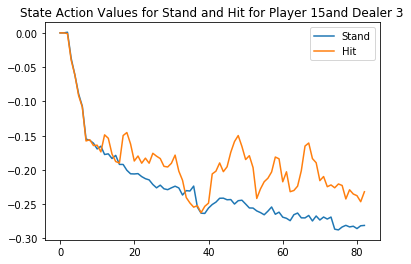

<Figure size 432x288 with 0 Axes>